#We will use GeoJSON to plot ploygons map
( plot the boundry of each states in the US)

what's GeoJSON ? This is an example:https://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_500k.json

--2025-08-06 12:24:41--  https://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_500k.json
Resolving eric.clst.org (eric.clst.org)... 69.163.143.20
Connecting to eric.clst.org (eric.clst.org)|69.163.143.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2490848 (2.4M) [application/json]
Saving to: ‘us_states.geojson’

us_states.geojson   100%[===================>]   2.38M  14.7MB/s    in 0.2s    

2025-08-06 12:24:41 (14.7 MB/s) - ‘us_states.geojson’ saved [2490848/2490848]



<Axes: >

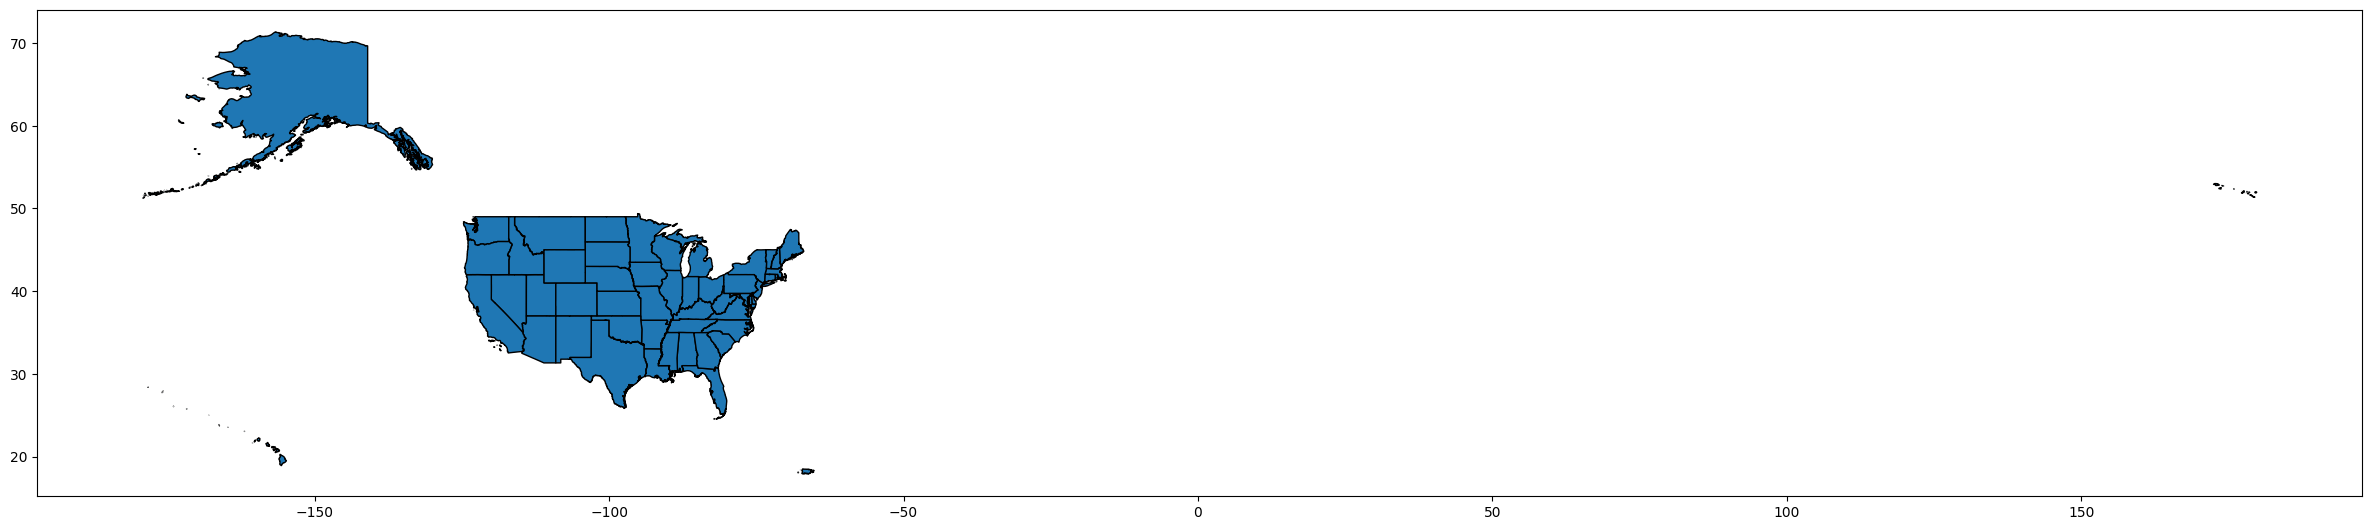

In [4]:
!wget https://eric.clst.org/assets/wiki/uploads/Stuff/gz_2010_us_040_00_500k.json -O us_states.geojson

import geopandas as gpd
gdf = gpd.read_file("us_states.geojson")
gdf.plot(edgecolor='black', figsize=(30, 17)) # Increased the figure size

you can click the image if you want it bigger

#Now we want to plot the choropleth map to show the gdp per capita for each state.

In [ ]:
# GDP per capita dictionary
gdp_per_capita_2024 = {
    "District of Columbia": 263220,
    "New York": 117332,
    "Massachusetts": 110561,
    "Washington": 108468,
    "California": 104181,
    "Connecticut": 99355,
    "Delaware": 97428,
    "Alaska": 94306,
    "North Dakota": 93548,
    "Colorado": 92674,
    "Illinois": 90267,
    "Texas": 89560,
    "Minnesota": 88745,
    "New Jersey": 88612,
    "Oregon": 86637,
    "Utah": 86229,
    "Rhode Island": 85043,
    "Virginia": 84308,
    "Nebraska": 83121,
    "Pennsylvania": 82577,
    "New Hampshire": 82107,
    "Georgia": 81692,
    "Wisconsin": 81230,
    "Nevada": 80548,
    "Iowa": 79856,
    "North Carolina": 78449,
    "Ohio": 77468,
    "South Dakota": 76490,
    "Indiana": 75403,
    "Florida": 75144,
    "Tennessee": 74322,
    "Arizona": 73102,
    "Vermont": 72589,
    "Missouri": 71545,
    "Maine": 70994,
    "Michigan": 70317,
    "Kansas": 69374,
    "South Carolina": 68051,
    "Louisiana": 66291,
    "Montana": 66106,
    "Oklahoma": 65374,
    "Idaho": 64834,
    "New Mexico": 63448,
    "Kentucky": 62183,
    "Alabama": 61744,
    "West Virginia": 60783,
    "Arkansas": 60276,
    "Mississippi": 53061
}


Convert Geojson to a dataframe

In [6]:
gdp_per_capita_2024 = {
    "District of Columbia": 263220,
    "New York": 117332,
    "Massachusetts": 110561,
    "Washington": 108468,
    "California": 104181,
    "Connecticut": 99355,
    "Delaware": 97428,
    "Alaska": 94306,
    "North Dakota": 93548,
    "Colorado": 92674,
    "Illinois": 90267,
    "Texas": 89560,
    "Minnesota": 88745,
    "New Jersey": 88612,
    "Oregon": 86637,
    "Utah": 86229,
    "Rhode Island": 85043,
    "Virginia": 84308,
    "Nebraska": 83121,
    "Pennsylvania": 82577,
    "New Hampshire": 82107,
    "Georgia": 81692,
    "Wisconsin": 81230,
    "Nevada": 80548,
    "Iowa": 79856,
    "North Carolina": 78449,
    "Ohio": 77468,
    "South Dakota": 76490,
    "Indiana": 75403,
    "Florida": 75144,
    "Tennessee": 74322,
    "Arizona": 73102,
    "Vermont": 72589,
    "Missouri": 71545,
    "Maine": 70994,
    "Michigan": 70317,
    "Kansas": 69374,
    "South Carolina": 68051,
    "Louisiana": 66291,
    "Montana": 66106,
    "Oklahoma": 65374,
    "Idaho": 64834,
    "New Mexico": 63448,
    "Kentucky": 62183,
    "Alabama": 61744,
    "West Virginia": 60783,
    "Arkansas": 60276,
    "Mississippi": 53061
}

gdp_df = pd.DataFrame(list(gdp_per_capita_2024.items()), columns=['NAME', 'GDP_per_capita'])
display(gdp_df.head())

,NAME,GDP_per_capita
0,District of Columbia,263220
1,New York,117332
2,Massachusetts,110561
3,Washington,108468
4,California,104181



Merge the GeoDataFrame and the GDP per capita DataFrame using an inner merge on the 'NAME' column .



In [7]:
merged_gdf = gdf.merge(gdp_df, on='NAME', how='inner')
display(merged_gdf.head())

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry,GDP_per_capita
0,0400000US23,23,Maine,,30842.923,"MULTIPOLYGON (((-67.61976 44.51975, -67.61541 ...",70994
1,0400000US25,25,Massachusetts,,7800.058,"MULTIPOLYGON (((-70.83204 41.6065, -70.82374 4...",110561
2,0400000US26,26,Michigan,,56538.901,"MULTIPOLYGON (((-88.68443 48.11578, -88.67563 ...",70317
3,0400000US30,30,Montana,,145545.801,"POLYGON ((-104.0577 44.99743, -104.25014 44.99...",66106
4,0400000US32,32,Nevada,,109781.180,"POLYGON ((-114.0506 37.0004, -114.05 36.95777,...",80548





Create the choropleth map using the merged data, with colors representing the GDP per capita.


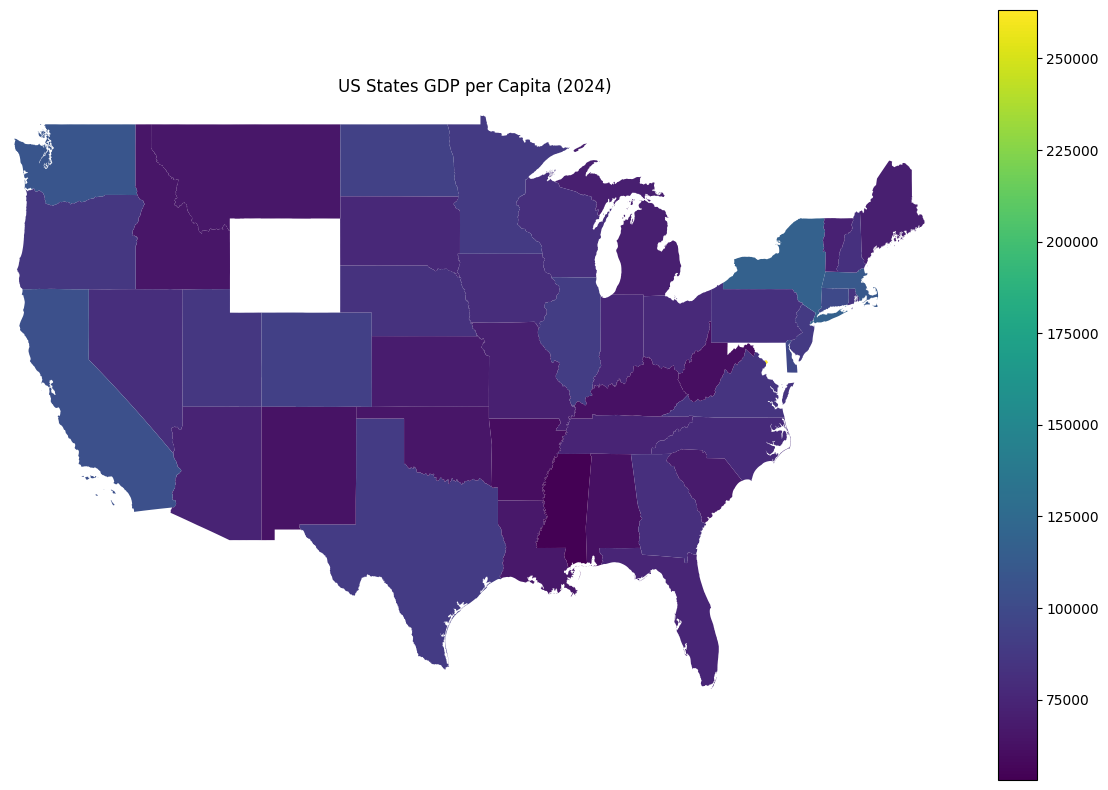

In [11]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_gdf.plot(column='GDP_per_capita', ax=ax, legend=True, cmap='viridis')

# Set the title
ax.set_title("US States GDP per Capita (2024)")

# Set the limits to focus on the contiguous US
ax.set_xlim([-125, -66])
ax.set_ylim([25, 50])

# Remove the axes
ax.set_axis_off()

plt.show()

📌 Explanations of the parameters:
🟨 column='GDP_per_capita'
This tells GeoPandas to color each geometry (e.g., a state) based on the values in the GDP_per_capita column.

Higher values get different shades/colors than lower values.

🟨 ax=ax
This tells GeoPandas which Matplotlib Axes object to draw the plot on.

You usually define it like this:

python
Copy
Edit
fig, ax = plt.subplots(figsize=(10, 8))
Then you pass ax=ax to keep the map on the same figure.

🟨 legend=True
Adds a color legend (color bar) to the side of the map, showing what the colors mean in terms of GDP per capita.

🟨 cmap='viridis'
This sets the color map to 'viridis', which is a perceptually uniform color scale going from dark purple → blue → green → yellow.

It's great for representing numeric values clearly.



All the states are in purple or dark blue,can we  amplify the "colour difference" for better visualization?

--we can achieve that by lowering the upper bound of the legend.

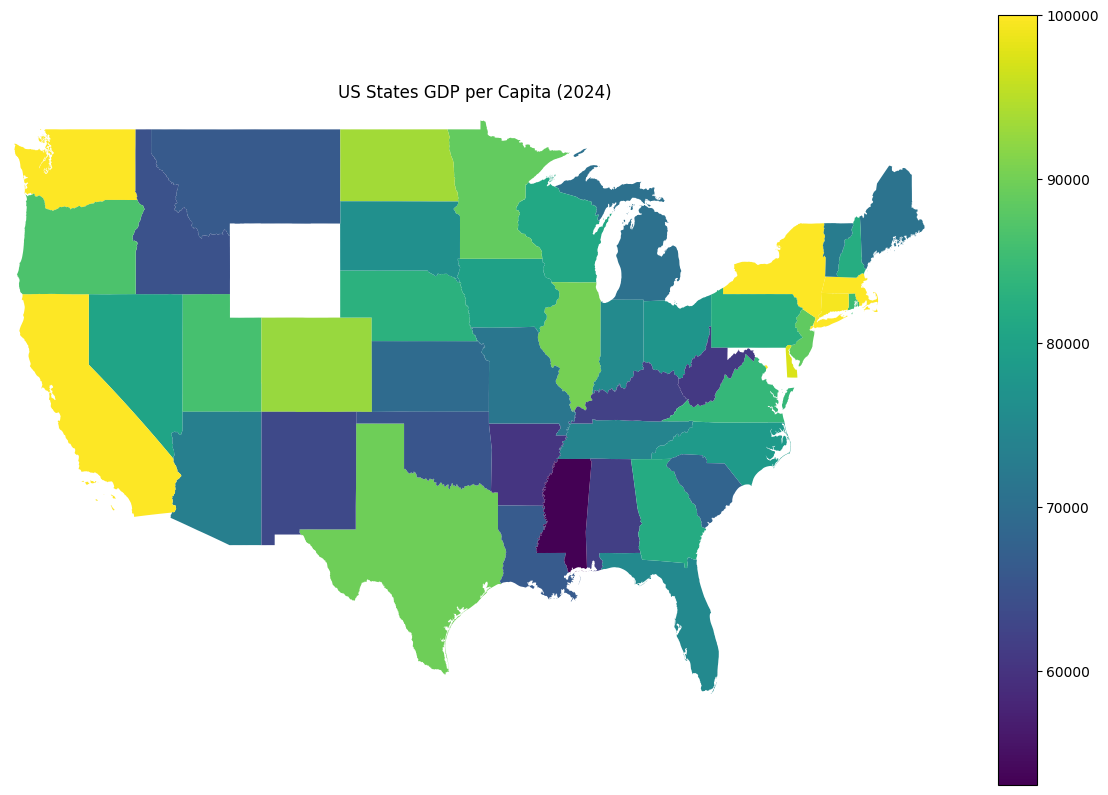

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_gdf.plot(column='GDP_per_capita', ax=ax, legend=True, cmap='viridis', vmax=100000 )

# Set the title
ax.set_title("US States GDP per Capita (2024)")

# Set the limits to focus on the contiguous US
ax.set_xlim([-125, -66])
ax.set_ylim([25, 50])

# Remove the axes
ax.set_axis_off()

plt.show()